<a href="https://colab.research.google.com/github/GenoKiller777/PythonMyFirstNeuronalNetwork/blob/main/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Invocación de paquetes

In [15]:
import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.12.0


### Carga del Dataset

In [34]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


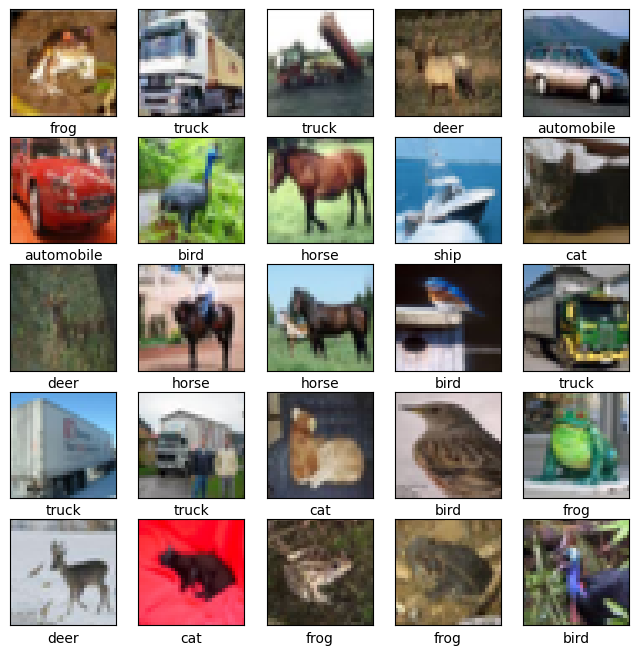

In [35]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Preparación del Dataset

In [36]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [37]:
# number of classes
K = len(np.unique(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

number of classes: 10


### Entrene una red convolutiva (CNN) a partir del set de datos propuesto


##### Modelado de la Red Neuronal CNN

In [38]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

##### Resumen de la Red CNN

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

#### Flujo visual de la Red Neuronal CNN

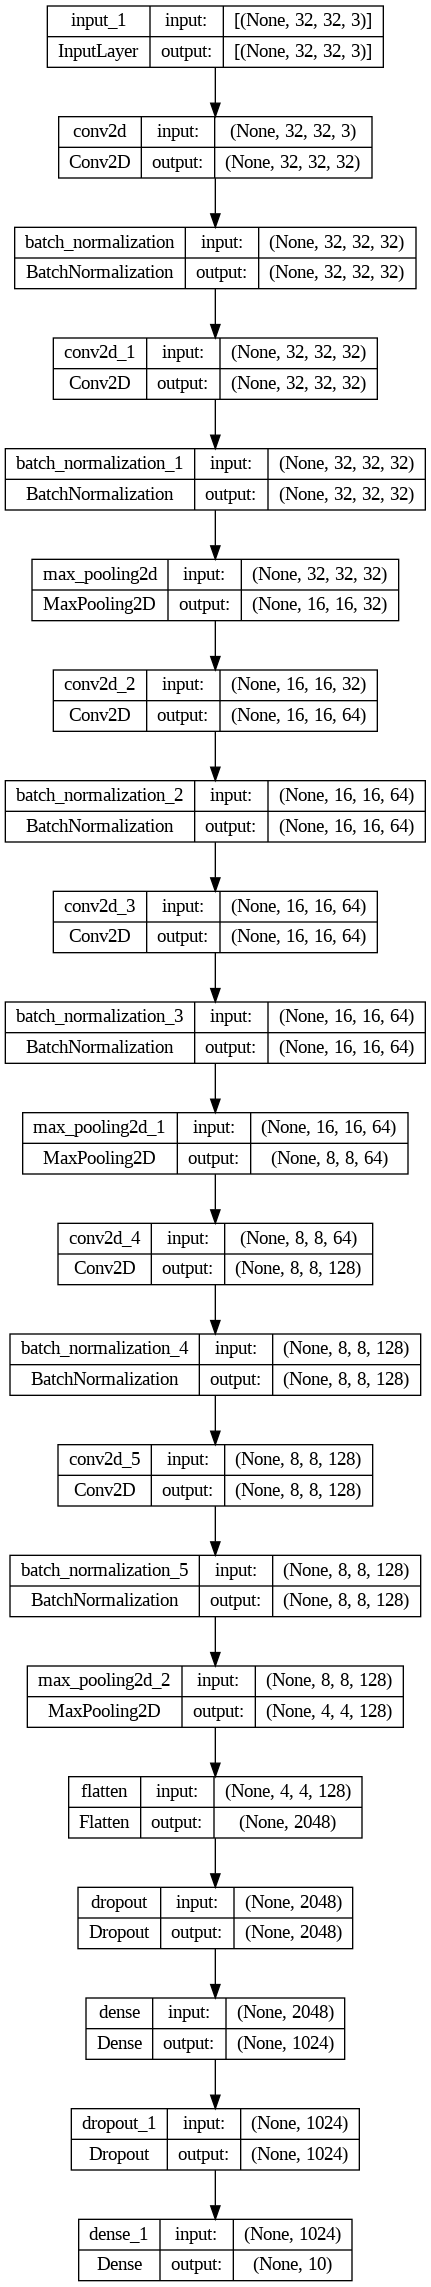

In [24]:
from keras.utils import plot_model

plot_model(model, 'net.png', show_shapes=True)

In [39]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

#### Entrenamiento del modelo

In [40]:
# Fit
history = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1563/1563 [==============================] - 20s 9ms/step - loss: 1.2830 - accuracy: 0.5577 - val_loss: 0.9510 - val_accuracy: 0.6738
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8433 - accuracy: 0.7057 - val_loss: 0.7826 - val_accuracy: 0.7358
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6897 - accuracy: 0.7607 - val_loss: 0.8753 - val_accuracy: 0.6985
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5907 - accuracy: 0.7965 - val_loss: 0.6608 - val_accuracy: 0.7748
Epoch 5/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4968 - accuracy: 0.8289 - val_loss: 0.8783 - val_accuracy: 0.7077
Epoch 6/100
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4182 - accuracy: 0.8560 - val_loss: 0.6711 - val_accuracy: 0.7951
Epoch 7/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3525 - accuracy: 0.8795 - val_loss: 0.6129 -

#### Segundo entremiento con imagenes volteadas del Dataset para aumentar el soporte para el entreamiento

In [44]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

history = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=100)

Epoch 1/100
1562/1562 [==============================] - 42s 26ms/step - loss: 0.5567 - accuracy: 0.8268 - val_loss: 0.5586 - val_accuracy: 0.8330
Epoch 2/100
1562/1562 [==============================] - 42s 27ms/step - loss: 0.4427 - accuracy: 0.8559 - val_loss: 0.4865 - val_accuracy: 0.8458
Epoch 3/100
1562/1562 [==============================] - 40s 26ms/step - loss: 0.4110 - accuracy: 0.8669 - val_loss: 0.4861 - val_accuracy: 0.8515
Epoch 4/100
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3953 - accuracy: 0.8696 - val_loss: 0.4486 - val_accuracy: 0.8535
Epoch 5/100
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3699 - accuracy: 0.8787 - val_loss: 0.4834 - val_accuracy: 0.8466
Epoch 6/100
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3548 - accuracy: 0.8812 - val_loss: 0.5350 - val_accuracy: 0.8448
Epoch 7/100
1562/1562 [==============================] - 42s 27ms/step - loss: 0.3501 - accuracy: 0.8850 - val_loss: 0

### Determine accuracy y matriz de confusión


#### Accuracy del modelo

In [49]:
test_lost, test_acc = model.evaluate(x_test, y_test, verbose=0)

In [51]:
print(f'Test Accuracy: ',round(test_acc*100,3),'%.')

Test Accuracy:  88.81 %.


#### Matriz de Confusión de la Red CNN

In [53]:
predictions  = model.predict(x_test)
predictions_for_cm = predictions.argmax(1)

313/313 [==============================] - 1s 4ms/step


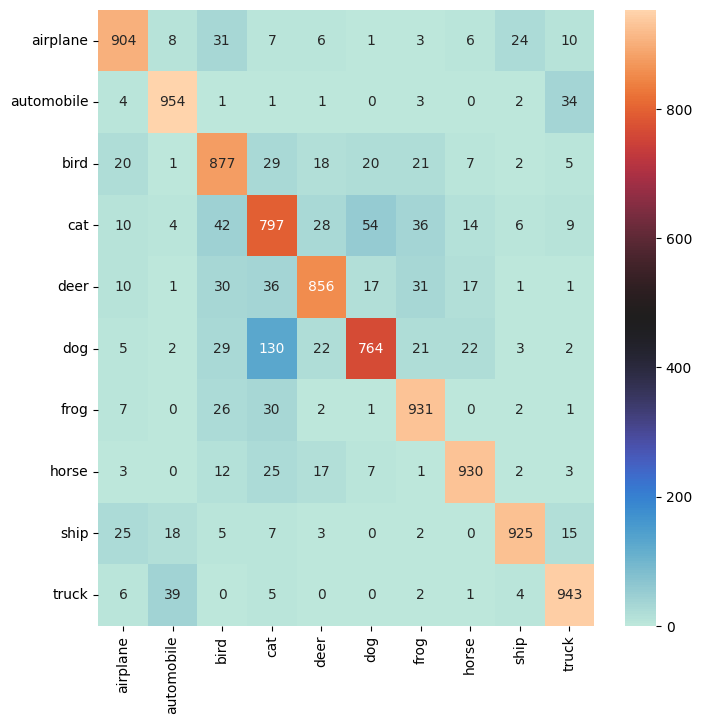

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

cm = confusion_matrix(y_test,predictions_for_cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names,fmt='.0f', cmap='icefire')
plt.show()

### Haga un gráfico de loss y accuracy por epoch


In [45]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


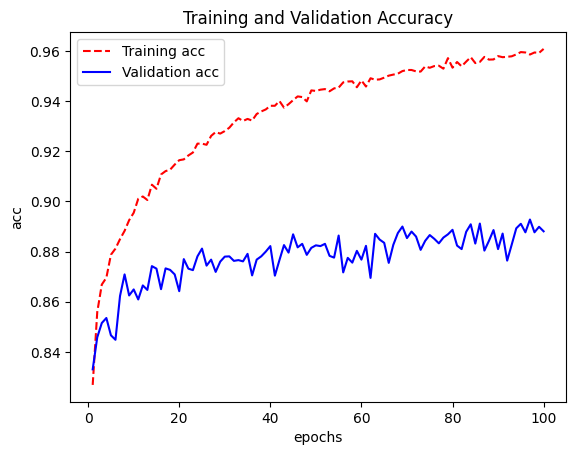

<Figure size 640x480 with 0 Axes>

In [46]:
acc      = history.history['accuracy' ]
val_acc  = history.history['val_accuracy' ]
loss     = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()
plt.show()

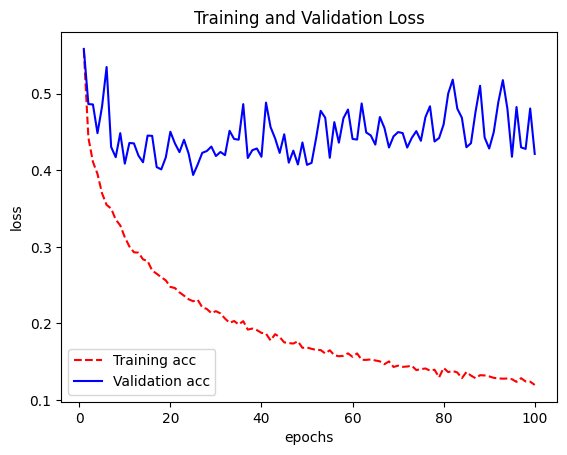

<Figure size 640x480 with 0 Axes>

In [47]:
plt.plot  ( epochs,     loss, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_loss ,  'b', label='Validation acc' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()
plt.show()

### Predición de la imagen, a traves del la Red CNN entrenada.

1/1 [==============================] - 0s 20ms/step
Original label is automobile and predicted label is automobile


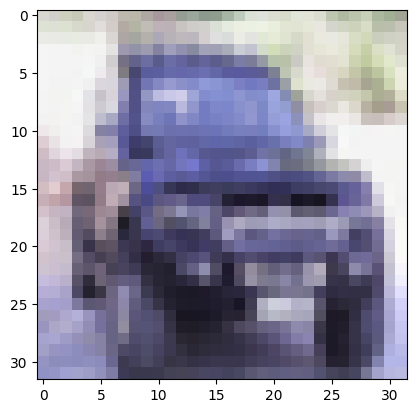

In [67]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 9 #car

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))
